Top 3 Most Profitable Products:
                                  PROD_NAME  TOT_SALES
0          Dorito Corn Chp     Supreme 380g    40352.0
1    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Most Loyal Customer Segments:
                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  168363.25
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60
13               RETIREES       Mainstream  155677.05
15         YOUNG FAMILIES           Budget  139345.85
9   OLDER SINGLES/COUPLES           Budget  136769.80


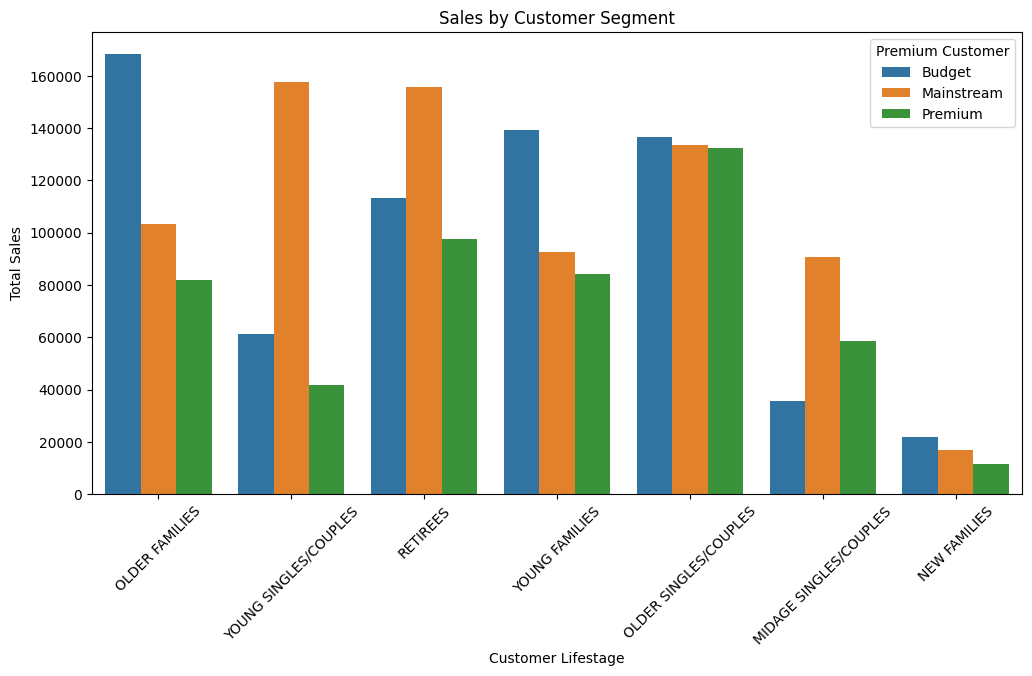


Hypothesis: Loyal customers might prefer premium products if they have higher spending capacity.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

purchase_behaviour = pd.read_csv('purchase_behaviour.csv')
transaction_data = pd.read_csv('transaction_data.csv')

merged_data = transaction_data.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

top_products = merged_data.groupby(['PROD_NAME'])['TOT_SALES'].sum().nlargest(3).reset_index()
print("Top 3 Most Profitable Products:")
print(top_products)

loyal_customers = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
loyal_customers = loyal_customers.sort_values(by='TOT_SALES', ascending=False)
print("Most Loyal Customer Segments:")
print(loyal_customers.head())

# Hypothesis: Plot sales distribution by customer type
plt.figure(figsize=(12, 6))
sns.barplot(data=loyal_customers, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title("Sales by Customer Segment")
plt.xlabel("Customer Lifestage")
plt.ylabel("Total Sales")
plt.legend(title="Premium Customer")
plt.show()

print("\nHypothesis: Loyal customers might prefer premium products if they have higher spending capacity.")
